In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from IPython.display import display as Idisplay
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_excel('data.xlsx',sheetname='Andrey - Simulation',header=0,skiprows=[0,1,2,4,3,6,7])
df.rename(columns={'pH': 'pH - inflow','Temp': 'Temp - inflow','Conductivity': 'Conductivity - inflow',
                   'COD':'COD - inflow', 'Ntotal':'Ntotal - inflow','NH4-N':'NH4-N - inflow',
                   'NO3-N':'NO3-N - inflow','NO2-N':'NO2-N - inflow','PO4-Ptotal ':'PO4-Ptotal - inflow',
                   'PO4-P':'PO4-P - inflow','Coloration  (#777)':'Coloration - 436nm - inflow',
                   'Unnamed: 13':'Coloration - 525nm - inflow','Unnamed: 14':'Coloration - 620nm - inflow',
                   'Flux':'Flux - inflow',' volume compensation with outflow':' volume compensation with outflow',
                   'pH.1':'pH - reactor','Conductivity.1':'Conductivity_-_reactor',
                   'Resistance time': 'Resistance time', 'Total Suspended Solids': 'TSS',
                   'Volatile Suspended Solids': 'VSS', 'Sludge Loading': 'Sludge Loading','pH.2':'pH - outflow',
                   'Temp.1':'Temp - outflow','Conductivity.2':'Conductivity - outflow','COD.1':'COD - outflow',
                   'Ntotal.1':'Ntotal - outflow','NH4-N.1':'NH4-N - outflow','NO3-N.1':'NO3-N - outflow',
                   'NO2-N.1':'NO2-N - outflow','PO4-Ptotal .1':'PO4-Ptotal - outflow','PO4-P.1':'PO4-P - outflow',
                   'Coloration (no dilution)     (#777)':'Coloration - 436nm - outflow',
                   'Unnamed: 38':'Coloration - 525nm - outflow','Unnamed: 39':'Coloration - 620nm - outflow',
                   'Flux.1':'Flux - outflow','Unnamed: 42':'Comment'},inplace=True)
columns = df.columns
new_columns = []

for name in columns:
    new_name = name.replace(' ','_')
    new_columns.append(new_name)
    
df.columns = new_columns

In [4]:
personal = df.loc[:,'Date':'Day']
inflow = df.loc[:,'pH_-_inflow':'_volume_compensation_with_outflow']
reactor = df.loc[:,'Reactor_volume':'Sludge_Loading']
outflow = df.loc[:,'pH_-_outflow':'Flux_-_outflow']
work = df.loc[:,'pH_-_inflow':'Sludge_Loading']


COD_-_outflow 1.0
pH_-_reactor 0.165727217887
Conductivity_-_reactor 0.164810008238
NH4-N_-_inflow 0.140923761215
COD_-_inflow 0.129446515087
Coloration_-_436nm_-_inflow 0.0994434665154
Coloration_-_525nm_-_inflow 0.0938643656523
Coloration_-_620nm_-_inflow 0.0916187799425
Sludge_Loading 0.0878193917917
VSS 0.0798341030639
Conductivity_-_inflow 0.0437989353582
Ntotal_-_inflow 0.0346033634039
NO2-N_-_inflow 0.0321316322856
Temp_-_inflow 0.0296495107802
_volume_compensation_with_outflow 0.0267687572608
TSS 0.0255628059382
Excess_sludge 0.0249214297858
pH_-_inflow 0.0225136434122
PO4-Ptotal_-_inflow 0.0169726106944
NO3-N_-_inflow 0.0119039577463
T 0.00801876422519
Flux_-_inflow 0.00758091237628
Reactor_volume 0.00184200677548
PO4-P_-_inflow 0.000248065294736
Residence_time 0.0001885661681


/home/salesbarbosa/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


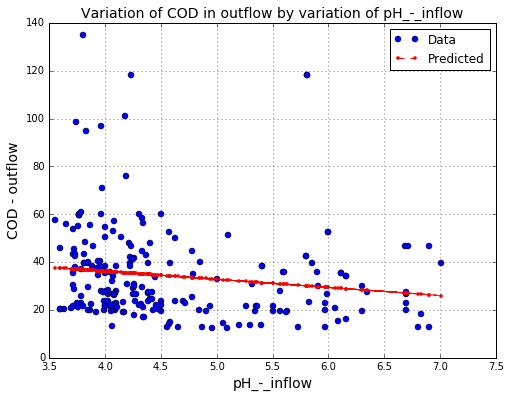

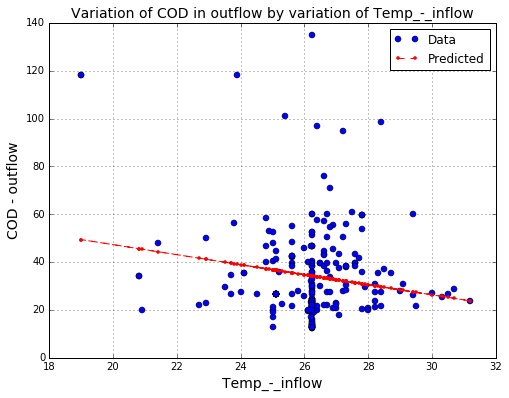

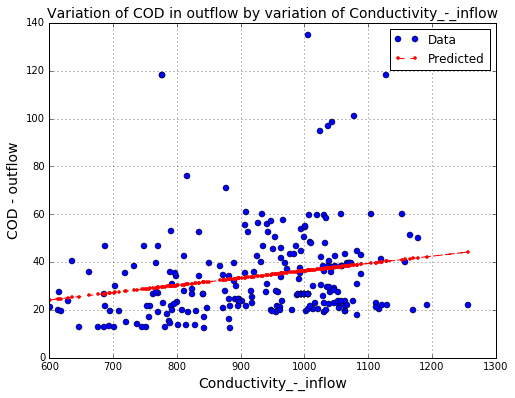

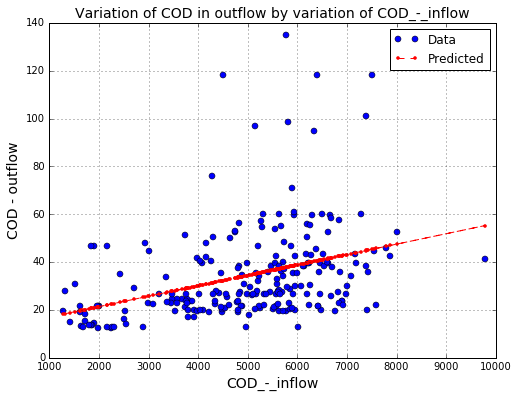

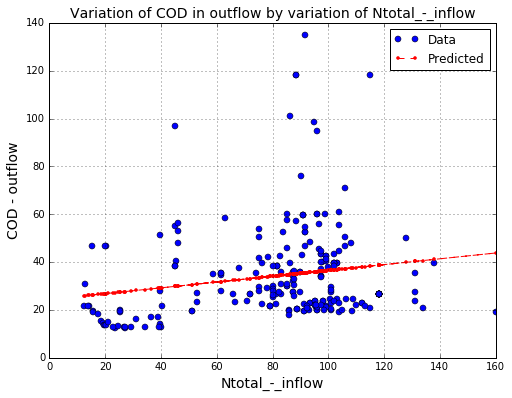

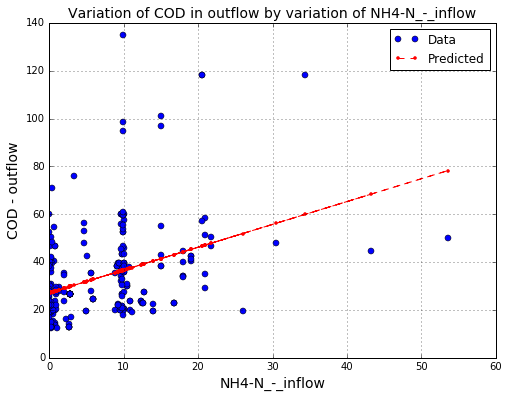

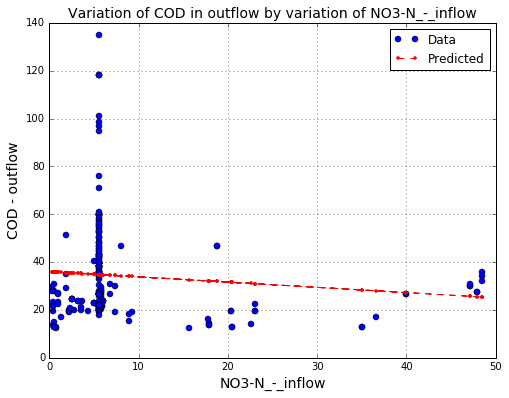

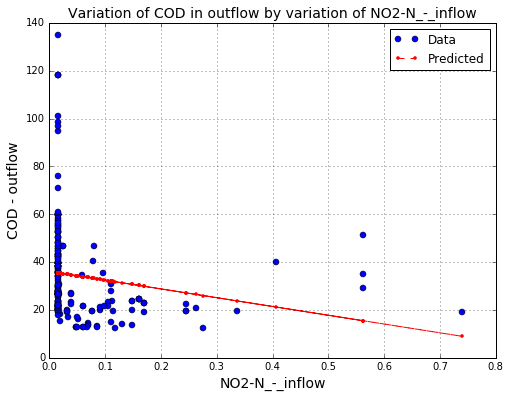

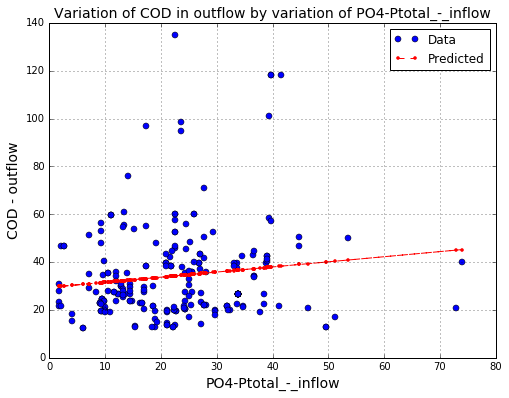

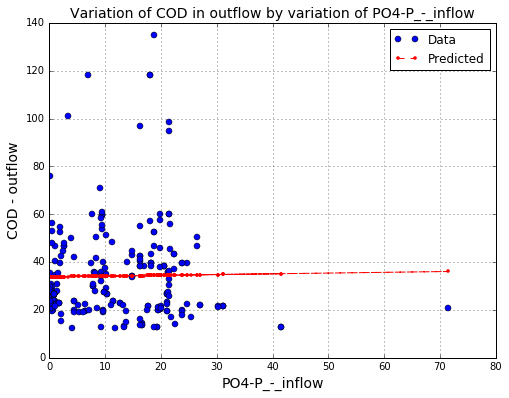

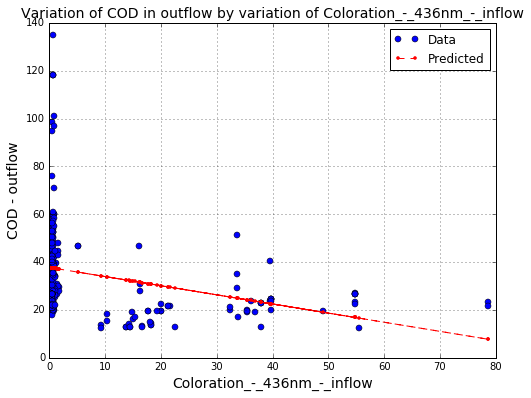

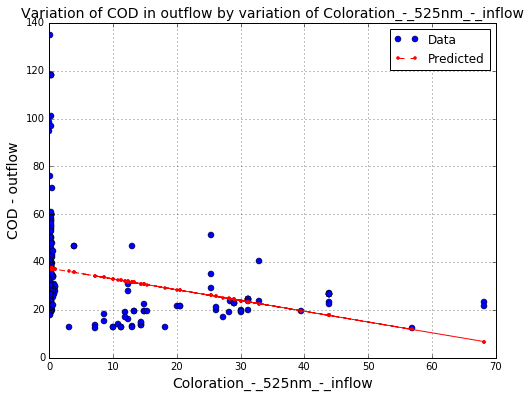

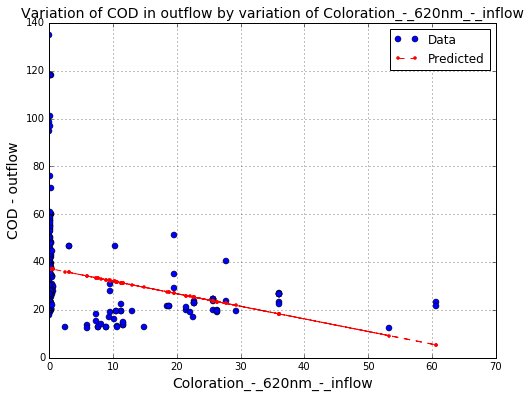

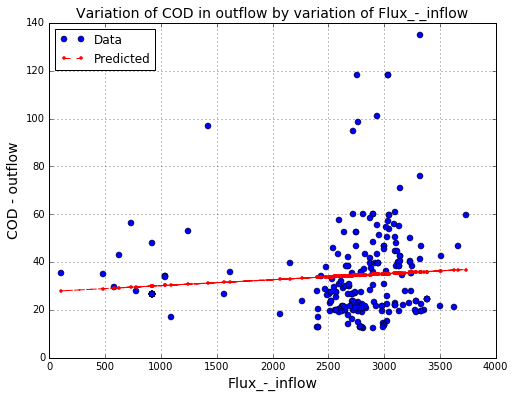

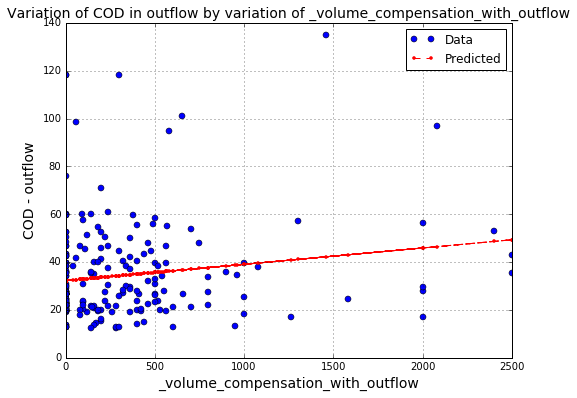

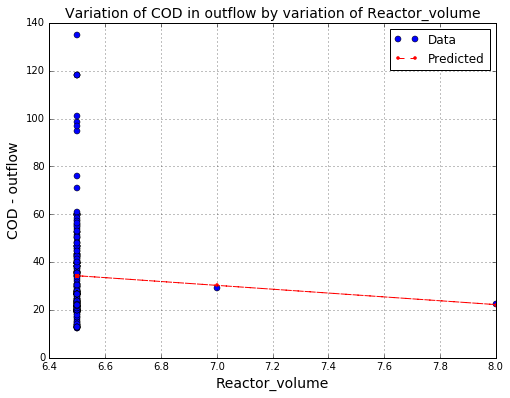

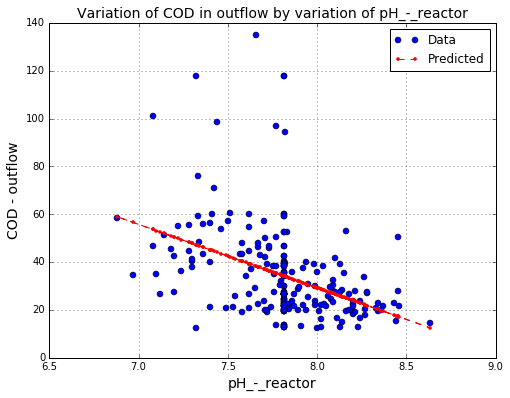

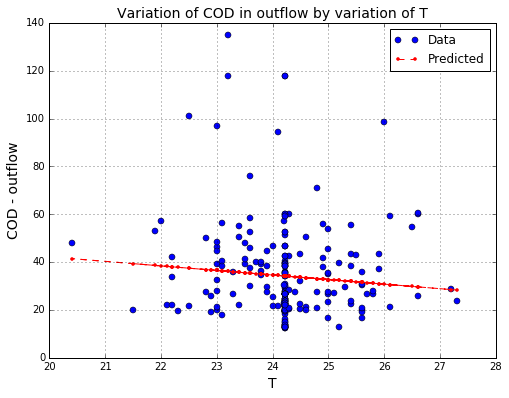

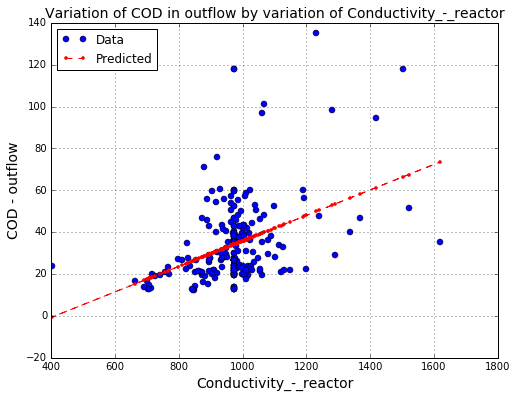

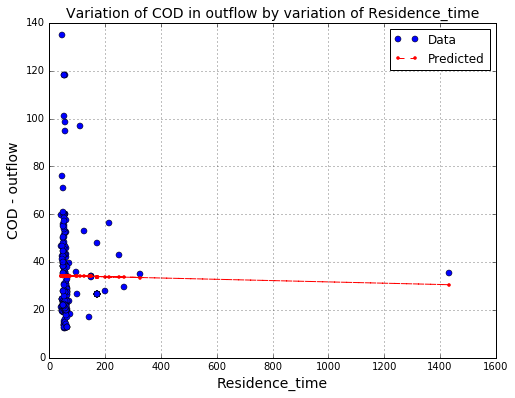

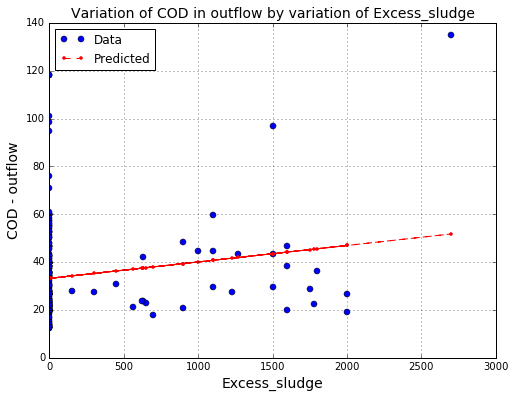

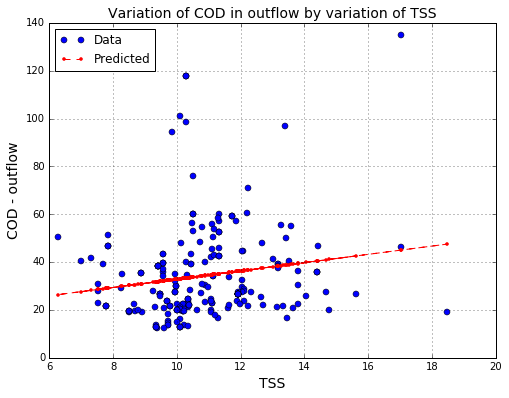

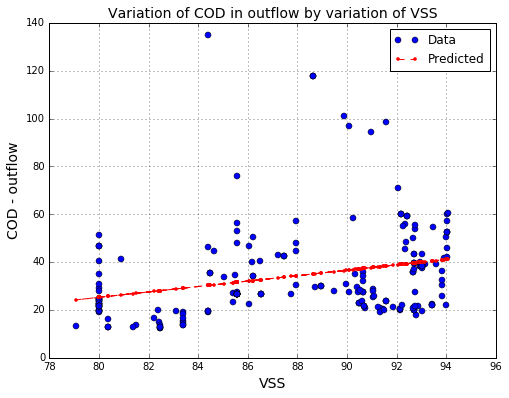

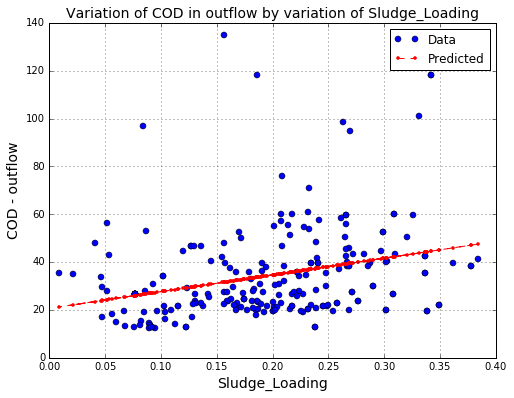

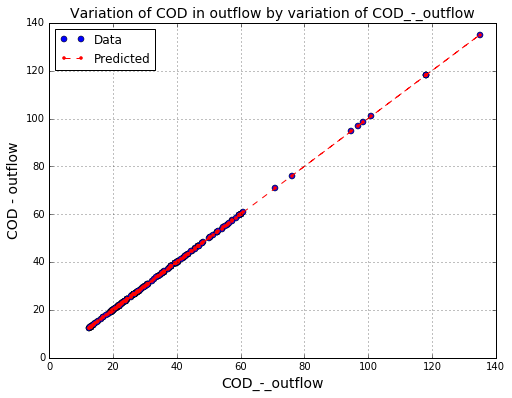

In [15]:
#Correlation for COD - outflow
work['COD_-_outflow'] = outflow.loc[:,'COD_-_outflow']
for name in work.columns:
    mean = work[name].mean()
    work[name].fillna(mean,inplace=True)

t = []
for name in work.columns:
    try:
        if name not in work.columns:
            continue
        if work[name].var() < 1e-7:
            continue
        
        
        formula = "Q('COD_-_outflow') ~ Q('"+name+"')"
        model = smf.ols(formula,data=work)
        
        results = model.fit()
    except (ValueError, TypeError):
        continue
        
    t.append((results.rsquared, name))
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(work[name], work['COD_-_outflow'], 'o', label="Data")
    ax.plot(work[name], results.fittedvalues, 'r--.', label="Predicted")
    plt.xlabel(name,fontsize=14)
    plt.ylabel('COD - outflow',fontsize=14)
    plt.title('Variation of COD in outflow by variation of '+name,fontsize=14)
    plt.grid(True)
    legend = ax.legend(loc="best")
    fig.savefig('plot_'+name+'.png')
    

t.sort(reverse=True)
for mse,name in t:
    print(name,mse)

In [136]:
#Taking the firsts measurements and put them inside the formule, two by two
formula1 = "Q('pH_-_outflow') ~ + Q('pH_-_reactor')+Q('Conductivity_-_reactor')"
formula2 = "Q('pH_-_outflow') ~ + Q('pH_-_reactor')+Q('NH4-N_-_inflow')"
formula3 = "Q('pH_-_outflow') ~ + Q('pH_-_reactor')+Q('Flux_-_inflow')"
formula4 = "Q('pH_-_outflow') ~ + Q('pH_-_reactor')+Q('PO4-P_-_inflow')"
  



In [137]:
model1 = smf.ols(formula1,data=work)
res1 = model1.fit()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:      Q('pH_-_outflow')   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     47.69
Date:                Tue, 19 Jan 2016   Prob (F-statistic):           5.28e-18
Time:                        16:47:49   Log-Likelihood:                -2.9154
No. Observations:                 229   AIC:                             11.83
Df Residuals:                     226   BIC:                             22.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept         